# Making pretty figures with ggplot2

`ggplot2` is an R package for creating figures. It has many strengths over the base R graphics, such as ease of use. Since one can write a whole book on ggplot2 [(and, in fact, there is one)](https://www.amazon.com/dp/0387981403/ref=cm_sw_su_dp?tag=ggplot2-20), the goal here is not to present everything in detail, but to walk you through the basic use and structure of ggplot2 commands, and to give you some examples. This will equip you with the basic tools necessary to use ggplot2 and from there you can find additional information as to how to do things in various places. Before we get to the basics, here are two very useful references if you ever feel lost or need more information:

1. [Reference sheet of ggplot2 elements and commands](http://ggplot2.tidyverse.org/reference/)
2. [ggplot2 cheat sheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)

In the tutorial below we'll be using the `diamonds` dataset from the ggplot2 package. It contains "the prices and other attributes of almost 54,000 diamonds." You can get information about the variables by typing `?diamonds'` or at this [link](http://ggplot2.tidyverse.org/reference/diamonds.html).

### 1. Basics first

The two basic ideas behind `ggplot2` are that:
1. You add elements to a plot in layers
2. You create a *mapping* between plot elements. Plot elements can include things like the x-axis, y-axis, color of data points, etc, and variables in your data.frame.

In `ggplot` the different layers are called *geoms* (a geometric object), and the mappings between elements and data is called an *aes* (an aesthetic object). 

Here's an example of a ggplot2 function, that we'll dissect:

In [ ]:
?scale_x_continuous

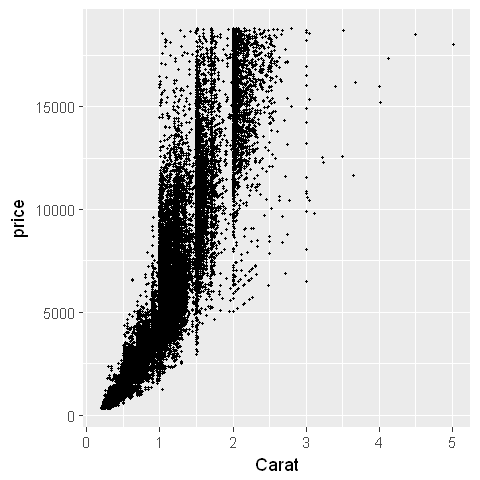

In [14]:
# set the size of the plot in jupyter
options(repr.plot.width=4, repr.plot.height=4) 
library(ggplot2)#load the library

ggplot(diamonds, aes(x=carat, y=price)) + #diamonds = the dataframe & aes() maps the carat variable to the x axis [...] 
    geom_point(size=0.5) + #set size of the points plotted 
    scale_x_continuous(name = 'Carat') #can set the x-tick interval/limits, here, I give it a name

The above function contains almost all of the basic **ggplot components** in their simplest form. Namely:
* main statement **ggplot(...)** - initializes the plot
    * data object - the first elements is always the data.frame which contains the data for plotting
    * aestethics, **aes()** - function in which we specify what to plot on the x axis, y axis, color, fill, shape, linetype, etc
* geoms (e.g. **geom_point(...)**) - creates a new layer with the plot type in question
* changing formatting (e.g. **scale_x_continuous(...)**) - in this case changes aspects of the x_axis

**_Note_**: as you may have noticed, different functions in ggplot are linked by a **`+`** sign. You can insert a new line after each plus sign, in order to help readibility. In ggplot, + signs between functions should be interpreted as "add layer" or "add formatting instructions", not as algebraic addition.

Here are the components labeled on the function:

![ggplot components](ggplot2_components.jpg)

### 2. Aesthetics

Aside from formatting the x and y axes, you can change the following aspects of the plot according to variables in your dataframe:

* color: color of the points/lines, etc
* fill: the fill color of bar graphs, box plots, histograms, etc
* shape: shape of points on a scatterplot
* size: size of points on a scatterplot
* linetype: solid, dashed, etc
* alpha: transparency of elements

Here are examples with each:

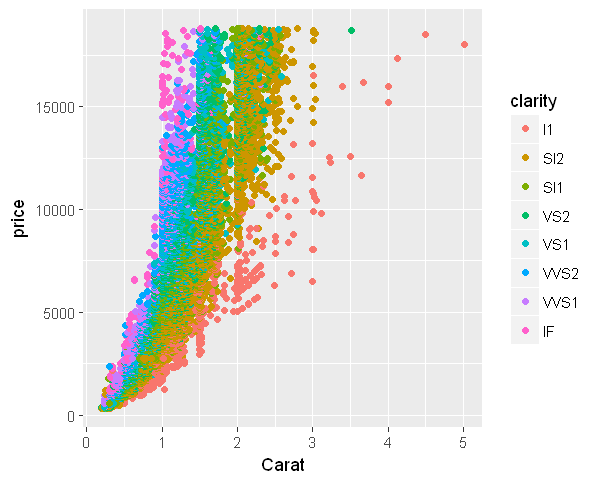

In [38]:
options(repr.plot.width=5, repr.plot.height=4)
# Change color of points as a function of their clarity
ggplot(diamonds, aes(x=carat, y=price, color=clarity)) +
    geom_point() +
    scale_x_continuous(name = 'Carat')

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."Warning message:
"Removed 5 rows containing missing values (geom_point)."

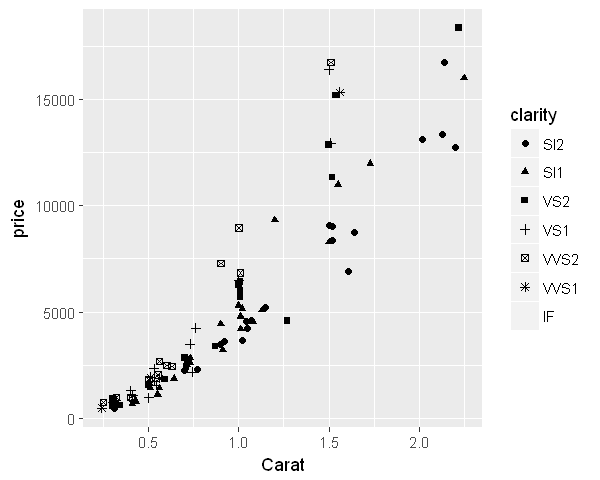

In [39]:
# get a smaller subset of data, to reduce overplotting
dsmall <- diamonds[sample(nrow(diamonds), 100), ] #randomly sample 100 data points
# Scatter plot of diamond price as a function of their carat and clarity
ggplot(dsmall, aes(x=carat, y=price, shape=clarity)) + #change shape with clarity
    geom_point() +
    scale_x_continuous(name = 'Carat')

#as the warning below mentions, there are limits to the automatic assignment of shapes 
#may need to specify explicit assignments if n_shapes (or any plot element) 
#exceeds automated capacity

Warning message:
"Using size for a discrete variable is not advised."

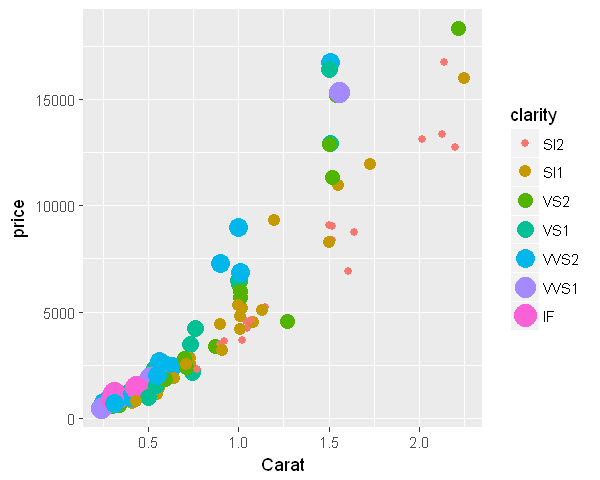

In [40]:
# Scatter plot of diamond price as a function of their carat and clarity
#clarity according to size AND color
ggplot(dsmall, aes(x=carat, y=price, size=clarity, color=clarity)) +
    geom_point() +
    scale_x_continuous(name = 'Carat')

### 3. Geoms

There are four broad types of geoms, depending on whether you are plotting raw data (e.g., every data point should be displayed), data distributions (e.g. density plots, histograms), summary data (e.g., only the mean of variable y for each level of x), and model_fits (e.g. fitting a regression line to the data). 

__Raw data is plotted with__:
* geom_point() - scatter plots
* geom_line() - line connecting datapoints
* geom_col() - bar chart
* geom_tile() - heatmap

__Distributions are plotted with (only specify an x variable - the y is calculated automatically by the distribution function)__ :
* geom_density() - density
* geom_histogram() - histograms
* geom_bar() - bar chart showing counts for each level of X (similar to histogram)

*_Note_ however, that you can change the default bandwidth selector used to calculate kernel density estimates if needed. Here's a [reference](https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/bandwidth) for the available options.* 

__Summary data are plotted with__:
* stat_summary(fun.data="summarising_function", geom="typeofplot"), where typeofplot is point, line, col, etc, and the summarising function tells ggplot how to transform the data. The default function is `mean_se` and it return the mean and the standard error for the y variable for each level of x.
* stat_summary_2d() - same as stat_summary, but in this case you are summarizing a third variable called z, over all combination of levels of x and y. It will create a heatmap of sorts
* geom_violin() - violin plot
* geom_boxplot() - boxplot

__Automatic model fits can be plotted with__:
* geom_smooth()

**Remember that the type of plot you should use depends on your [purpose](https://github.com/ft-interactive/chart-doctor/blob/master/visual-vocabulary/Visual-vocabulary.pdf).** 

### 3.1 Correlation

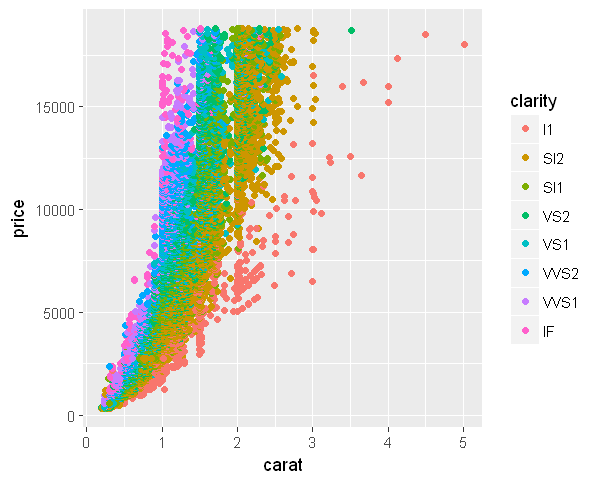

In [45]:
# overplotting
# Scatter plot of diamond price as a function of their carat and clarity
ggplot(diamonds, aes(x=carat, y=price, color=clarity)) +
    geom_point()

There are a lot of raw data points. We could, instead, calculate the mean price for each value of carat and plot the results. Instead of writing our own function to do this, we can just call the ``stat_summary`` function while plotting:

No summary function supplied, defaulting to `mean_se()


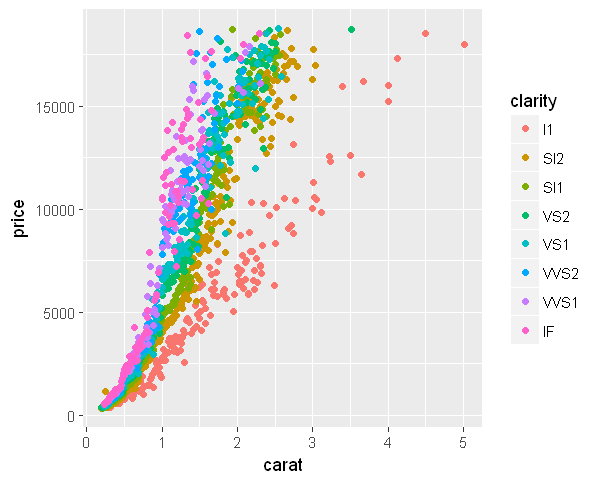

In [46]:
# # summarized plot of diamond price as a function of their carat and clarity
ggplot(diamonds, aes(x=carat, y=price, color=clarity)) +
    stat_summary(geom='point')

In the plot above, rather than showing individual datapoints, we see the average price for each recorded carat level. But since carat is a continuous variable, it would make more sense if we bin carat into groups, and then plot the mean price for those groups. One easy way is to just round carat to one significant digit, which would give us 10 bins for each carat unit, e.g., 0.1, 0.2,.... We can transform the x variable directly in the ggplot function:

No summary function supplied, defaulting to `mean_se()


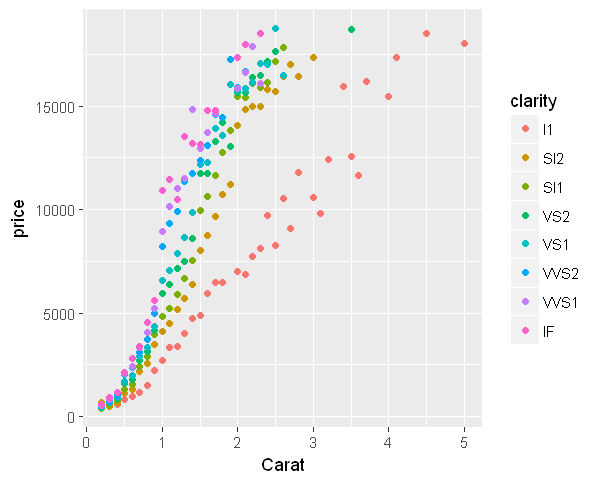

In [43]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=round(carat,1), y=price, color=clarity)) +
    stat_summary(geom='point') 

This has made it much easier to see the general trend. It would help if we add a line connecting the dots. You can just layer geoms like this: 

No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


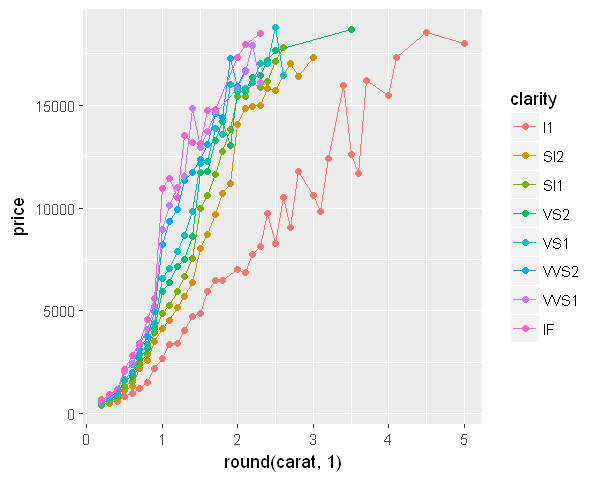

In [44]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=round(carat,1), y=price, color=clarity)) +
    stat_summary(geom='point') +
    stat_summary(geom='line') #you can layer geoms like this

One issue is that we have now lost the variability in price. To represent the variability, we can add error bars to each point:

No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
Warning message:
"Removed 18 rows containing missing values (geom_linerange)."

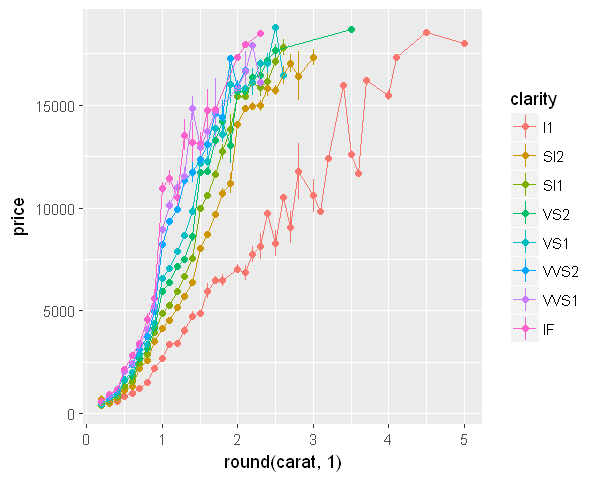

In [51]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=round(carat,1), y=price, color=clarity)) +
    stat_summary(geom='linerange') + #adding error bars in the form of a line with a range
    stat_summary(geom='point') +
    stat_summary(geom='line')

We see the error bars for many points, but not all. **Why?** 

Well for higher-carat diamonds, there are fewer of them due to the expense/scarcity. And for some of the highgest values of carat, there is only a single price! To help with that we can:

1. create even bigger bins 
2. transform carat and price variables with a logarithm - logarithms squash bigger values more than smaller values and would thus bring bigger values closer to each other.

Indeed, if we check the distribution of carat and price, we will see that they have a long-tailed skew, and would benefit from a log transformation for certain purposes. This will also illustrate how to create a histogram and a density plot:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


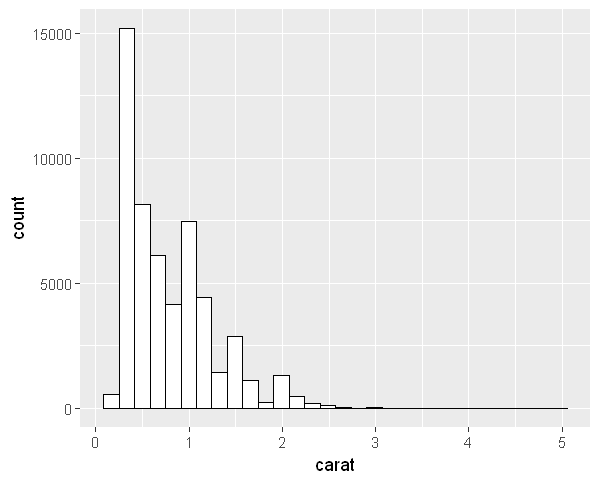

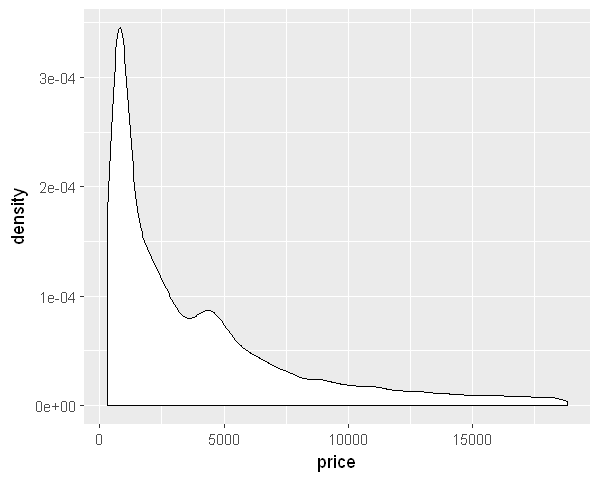

In [57]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=carat)) +
    geom_histogram(fill='white',color='black') #histogram

ggplot(diamonds, aes(x=price)) +
    geom_density(fill='white',color='black') #density plot

__*Note*__: When attributes such as fill or color are assigned outside of `aes`, they are not interpreted as a mapping. Instead, they apply to all of the data, which can be advantageous if you want consistent formatting. In this case we have a white histogram with black borders for all of the data.

Below is the transformed plot. Note that we are using the pipe to transform ``carat``, as explained in [the previous tutorial on tidyverse and piping](https://github.com/CoAxLab/DataSciencePsychNeuro_CMU85732/blob/master/RecitationNotebooks/Recitation02_modelObjects_tidydata.ipynb).

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.3.4     v purrr   0.2.4
v tidyr   0.7.2     v dplyr   0.7.4
v readr   1.1.1     v stringr 1.2.0
v tibble  1.3.4     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
Warning message:
"Removed 5 rows containing missing values (geom_linerange)."

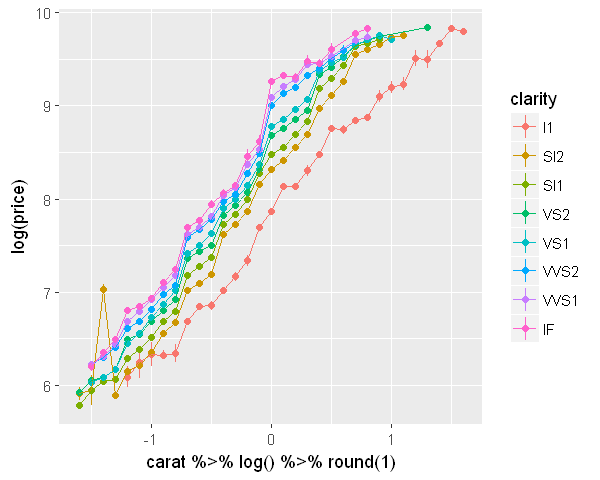

In [60]:
library(tidyverse)
ggplot(diamonds, aes(x=carat  %>% log()  %>% round(1), y=log(price), color=clarity)) +
    stat_summary(geom='linerange') +
    stat_summary(geom='point') +
    stat_summary(geom='line')

One good thing about tidyverse and ggplot is that ggplot also takes a dataframe as the first argument! If you remember from the [tidyverse tutorial](https://github.com/CoAxLab/DataSciencePsychNeuro_CMU85732/blob/master/RecitationNotebooks/Recitation02_modelObjects_tidydata.ipynb), you can chain tidyverse functions. In this case, to make the code clearer we could transform the variables with tidyverse, mutate,  then pass the result to ggplot like this:

No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
Warning message:
"Removed 5 rows containing missing values (geom_linerange)."

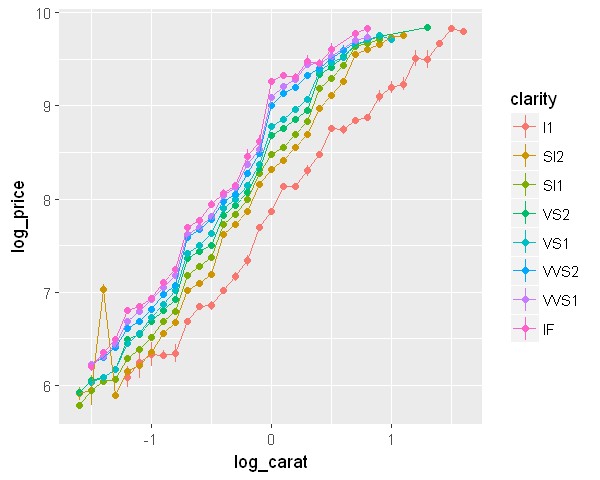

In [61]:
diamonds %>% 
    mutate(log_carat = carat  %>% log()  %>% round(1),
           log_price = log(price))  %>% 
    ggplot(aes(x=log_carat, y=log_price, color=clarity)) +
    stat_summary(geom='linerange') +
    stat_summary(geom='point') +
    stat_summary(geom='line')

### 3.2 Distribution

We already saw how to create histograms and density plots. What if we want to show the distribution separately for multiple groups? There are many ways we can do that. One option is boxplots:

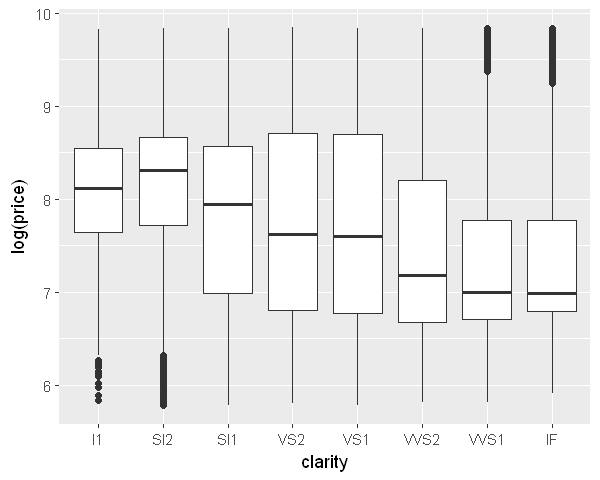

In [65]:
ggplot(diamonds, aes(x=clarity, y=log(price))) +
    geom_boxplot()

We could also do violin plots:

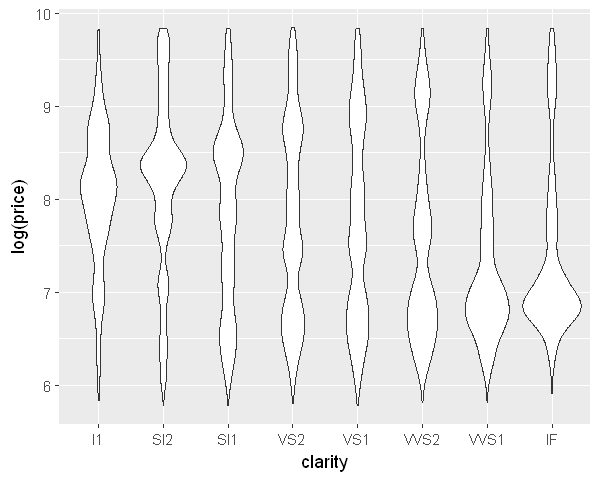

In [66]:
ggplot(diamonds, aes(x=clarity, y=log(price))) +
    geom_violin()

# More on distributions
<br>
Now let's turn to how to simulate distributions in R. Why would you want to do that? A few particularly salient reasons:

* You can use simulations to test whether your analysis pipeline is working the way that you think it is
* You can use simulations to perform power analyses (as we'll get into later) 
* From an educational perspective, simulations can help you to understand the properties of different families of distributions. 

---
## Random variables
Consider the _ith_ observation of a variable that we have labeled $x$. We shall call this observation $x_i$.

<br>
Formally we say that $x_i$ is a *random variable*, which means that it is a sample taken a particular probability distribution. Thus $x_i$ is a unique observation whose fundamental properties are determined by the underlying distribution that it was sampled from. 
<br>
Let's consider an example.


In [5]:
x <- rnorm(1)
x

[1] -1.510581

In this case we said that $x$ was pulled from a particular random distribution called a _normal distirbution_. It is just a single number, but its underlying nature is determined by the nature of the normal distribution itself.

---
## The Normal (Gaussian) Distribution

In the example above, $x_i$ was sampled from a _Gaussian distribution_, also called a _normal distrubtion_ or a _bell curve_. The normal distribution has two parameters that define its shape:

* mean: $\mu = \frac{1}{n} \sum_i^{n} x_i$
* standard deviation: $\sigma = \sqrt{\frac{1}{n} \sum_i^{n} (x_i - \mu)^2} $

Thus when we want to say that $x_i$ is sampled (or "pulled") from a normal distribution with a particular mean and standard deviation we'll write it this way.

$$ x \sim N(\mu, \sigma) $$

Sometimes we call the _mean_ the "expectation" of the distribution and it is written as $E(x)$. We will see both forms throughout the semester.

<br>
The normal probability distribution function is

$$ f(x) = \frac{1} {{\sigma \sqrt {2\pi } }} e^{{\frac{ - ( {x - \mu })^2 }{2\sigma^2} }} $$

This particular function will be important later, particularly as we get to linear regression. But right now there are a few things to take away from this equation.

* The _exponential_ term puts it in a class of distributions known as the _exponential family_. 
* The $\mu$ is the most likely expected value of this distribution (hence calling it an "expectation").
* The $\sigma$ defines the range of values about the mean that have the highest probability of being observed.

<br>
The particular values for $\mu$ and $\sigma$ will determine the scale and position of a normal distribution but, importantly, __not__ its shape. In the example code above, we sampled $x_i$ from a normal distribution with $\mu=0$ and $\sigma=1$. This is sometimes better known as the _standard normal distribution_.

<br>
Let's take a second to look at the shape of the normal distribution.

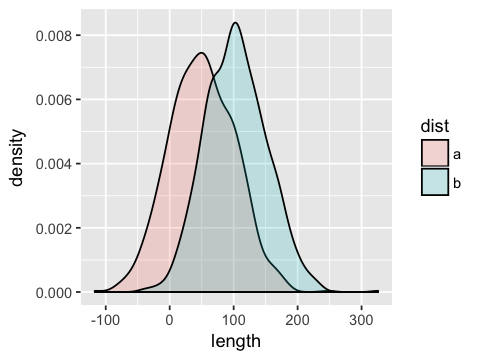

In [38]:
#install.packages("ggplot2") # If you haven't installed ggplot2, uncomment this line the first time you run
library(ggplot2) # Lets use ggplot for these
options(repr.plot.width=4, repr.plot.height=3) # This just makes the figure display manageable 

# Simulating 2 distributions of 1000 random variables each
n = 1000
mu_a = 50  # mean
mu_b = 100 # mean
sigma_a = 50 # standard deviation
sigma_b = 50 # standard deviation

# Generate the distributions as data frames
a = data.frame(length=rnorm(n, mean=mu_a, sd=sigma_a))
b = data.frame(length=rnorm(n, mean=mu_b, sd=sigma_b))
a$dist = 'a' # label
b$dist = 'b' # label

# Plot the probability distribution functions
dat=rbind(a,b)
ggplot(dat, aes(length, fill = dist)) + geom_density(alpha = 0.2)

Notice how the overall shape of the two  distributions is roughly the same, they're just shifted based on the different means.

<br>
Let's now play with the standard deviation of distribution _b_.

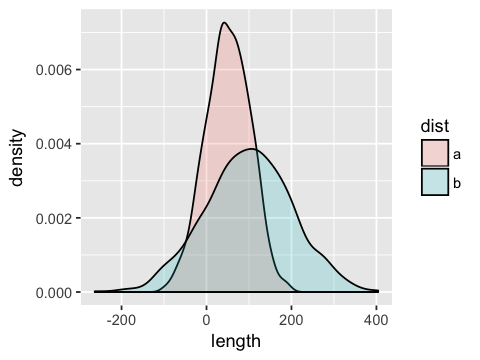

In [37]:
sigma_b = 100
b = data.frame(length=rnorm(n, mean=mu_b, sd=sigma_b))
b$dist = 'b'

dat=rbind(a,b)
ggplot(dat, aes(length, fill = dist)) + geom_density(alpha = 0.2)

You get the basic point. The _mean_ sets the center of the distribution, while the _variance_ determins its width. The fact that the overall shape of the normal distribution doesn't change with $\mu$ and $\sigma$ (as opposed to other probability distributions we will discuss below) make the normal distribution a highly useful tool in statistics.

---
## The Law of Large Numbers

<br>
Notice that in the example above, the distributions aren't perfect. They have some "uneveness" in theeir shape. This is because, with only 1000 observations, we don't have enough data to get a precise reflection of the true $\mu$ and $\sigma$.

This takes us to the first statistical law of the class.

<br>
__The Law of Large Numbers (LLN):__ As the number of observations of a random process increases, the percentage difference between the expected and actual values goes to zero.

The LLN is one of the most fundamental laws in statistics and is highly relevant for how we use statistics in our research. It means that as you accumulate samples or observations, the distributional properties of the sample will converge to the true distributional properties of the underlying distribution they were sampled from. This is precisely why larger sample sizes are preferred: _the greater the number of observations, the more certain you are that the observed means, variances, etc. are an accurate reflection of the real values._

<br>
Let's consider the LLN by example by simulating three different samples of cognitive scores that are "collected" from three studies with different sample sizes.


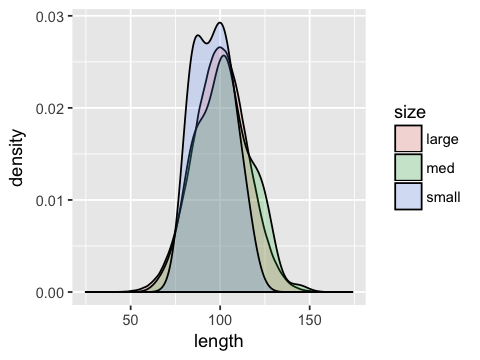

In [53]:
# Here we will simulate 3 sample distributions of different sizes, but same means & variances
mu       = 100
sigma    = 15
n_small  = 10
n_med    = 100
n_large  = 1000000

# Make new samples as data frames
small = data.frame(length=rnorm(n_small, mean=mu, sd=sigma))
med   = data.frame(length=rnorm(n_med, mean=mu, sd=sigma))
large = data.frame(length=rnorm(n_large, mean=mu, sd=sigma))
small$size = 'small' 
med$size = 'med' 
large$size = 'large'

# plot
dat=rbind(small,med, large)
ggplot(dat, aes(length, fill = size)) + geom_density(alpha = 0.2)

Notice how the distribution gets smoother as the sample size increases. They all should reflect random variability from the _same distribution_ (i.e., $x \sim N(100,15)$), but clearly they don't. To get a better look at the LLN effect, let's compare the medium sample and large sample distributions individually.

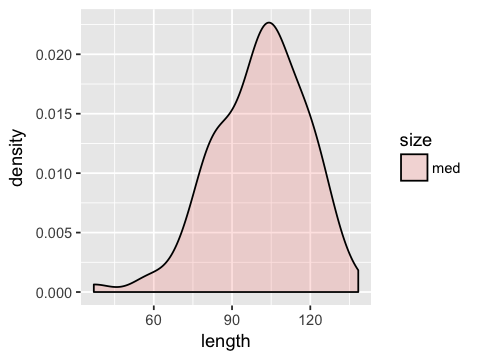

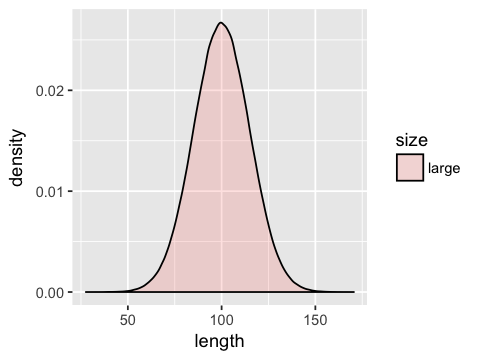

In [49]:
ggplot(med, aes(length, fill = size)) + geom_density(alpha = 0.2)
ggplot(large, aes(length, fill = size)) + geom_density(alpha = 0.2)                                                   

Here you can clearly see how increasing the number of observations provides a more reliable reflection of the true underlying distributional parameters.

---
# Non-normal distributions

The example above gives you a taste of the normal distribution. But that is not the only distribution type we will see over the course of the semester. Here are a few different types of distributions we will encounter. First we will go over their properties and then see what they look like.

<br>

## Uniform Distribution
All observations across a range from _a_ (min) to _b_ (max) are equally likely to occur. We denote a random variable from a uniform distribution as $ x \sim U(a,b) $

The properties of the uniform distribution are.

* $ P(x) = \frac{1}{b-a}, \quad a < x < b $

* $\mu = \frac{1}{2} (a + b) $

* $\sigma = \sqrt{\frac{1}{12} * (b-a)^2} $

For example, the probability of getting any number on a dice roll is described by a uniform distribution. Let's simulate 10,000 dice rolls.


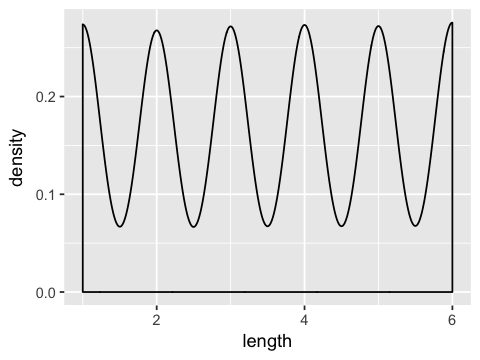

In [62]:
a = 0
b = 6
n = 10000

dat = data.frame(length=ceiling(runif(n, min=a, max=b)))
ggplot(dat, aes(length)) + geom_density(alpha = 0.2)


Since this is such a discrete function (there are only 6 possible that you can get), a histogram is probably a better way of visualizing this function.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


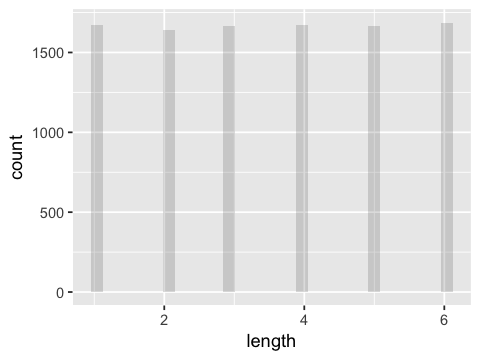

In [63]:
ggplot(dat, aes(length)) + geom_histogram(alpha = 0.2)

Notice that here you can clearly see that, as you'd expect, the probability of getting any value between 1 and 6 is equally likely.

## Exponential distribution

Here values fall off quickly (i.e., non-linearly) from a baseline value. We denote a random variable from an exponential distribution as $ x \sim exp(\lambda) $

The properties of the uniform distribution are.

* $ P(x) = \lambda e^{- \lambda x} $

* $\mu = \frac{1}{\lambda} $

* $\sigma = \sqrt{\frac{1}{\lambda^2}} $

The parameter $\lambda$ is often referred to as the _rate_ of the function, and reflects the efficiency of the fall off. 

In psychology & neuroscience, one of the most common places we come across exponential functions is with learning curves (i.e., errors fall off exponentially with practice). Let's consider a few different exponential distributions with different rate terms.



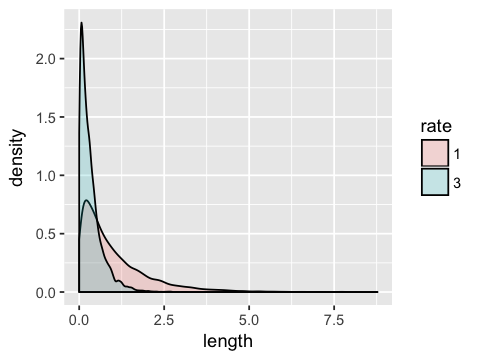

In [87]:
lambda_a = 1 # A slower rate
lambda_b = 3 # A faster rate
n = 10000

a = data.frame(length=rexp(n, rate=lambda_a))
b = data.frame(length=rexp(n, rate=lambda_b))

a$rate = '1'
b$rate = '3'
dat = rbind(a,b)
ggplot(dat, aes(length, fill=rate)) + geom_density(alpha = 0.2)


Notice how the higher $\lambda$ leads to a steeper decrease in values.

## The Chi-Squared ($\chi^2$) Distribution

The $\chi^2$ distribution is probably one of the trickiest probability distributions we will encounter this semester (_Note:_ This is not the same thing as the $\chi^2$ test, but they are related). It is heavily skewed but dramatically changes its shape based on the degrees of freedom ($k$) you give it. We denote a random variable pulled from a $\chi^2$ distribution as $x \sim \chi^2(k)$

The properties of the $\chi^2$ distribution are.

* $ P(x) = \frac{1}{2^{\frac{k}{2}} \Gamma(\frac{k}{2})} x^{\frac{k}{2-1}} e^{\frac{-x}{2}} $

* $\mu = k$

* $\sigma = \sqrt{2k}$

Note that in the proability distribution function, the term $\Gamma()$ denotes a [Gamma function](https://en.wikipedia.org/wiki/Gamma_function), where $\Gamma(n) = (n-1)!$ (e.g., if n = 4, then $\Gamma(4)= 3*2*1$)

We often encounter the $\chi^2$ distribution as a good descriptor of non-normal distributions, particularly if they are bounded by a particular value. Let's see how varying the degrees of freedom $k$ impacts the distribution shape here.


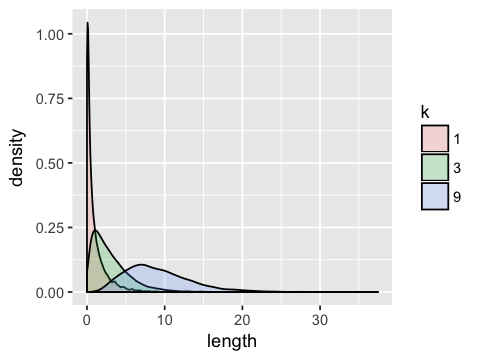

In [91]:
k_a = 1 
k_b = 3 
k_c = 9 
n = 10000

a = data.frame(length=rchisq(n, df=k_a))
b = data.frame(length=rchisq(n, df=k_b))
c = data.frame(length=rchisq(n, df=k_c))

a$k = '1'
b$k = '3'
c$k = '9'

dat = rbind(a,b,c)
ggplot(dat, aes(length, fill=k)) + geom_density(alpha = 0.2)

Notice how setting $k=1$ makes this look an awful lot like an _exponential distribution_? That's because the $\chi^2$ distribution comes from the same family of distrubtions. You guessed it... the _exponential family_ (just like the Normal distribution).

---
# QQ plots

Now that we have gone over a few different distribution types that you'll encounter this semester, you may be left wondering "How do I know if my data really comes from a particular distribution?" For example, if you are using a statistical test that assumes that your data is normally distributed, how can you check to see if it is?

While there are many statistical tests that will tell you to what degree your data fits a particular distribution (or some built in tools in R to try to tell you what distribution your data might come from), there is a quick visualization method to see whether your data arise from a specific distribution.

The _quantile-quantile (QQ) plot_ is a graphical technique for determining if an observed data set comes from a specific sampling distribution. It works by plotting the sorted distribution of your observed data, against a sorted random sample pulled from a specific theoretical distribution. 

Let's consider this by example. Below we will compare two "observed" data vectors (one pulled from a normal distribution and one pulled from a $\chi^2$ distribution) against the assumption that they both came from a normal distribution.


Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


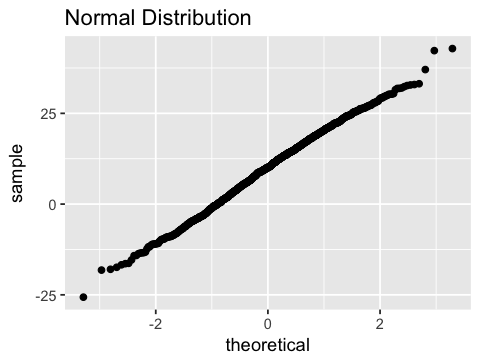

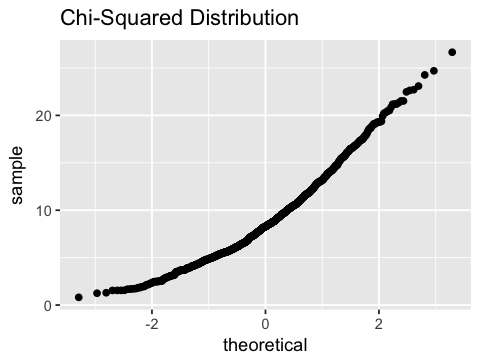

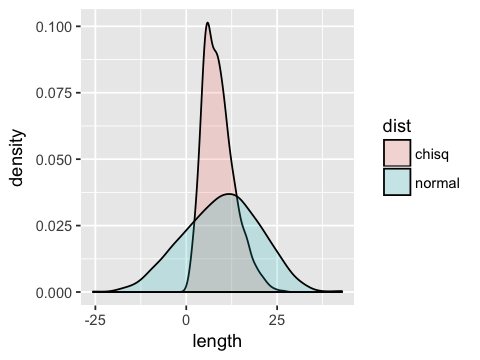

In [107]:
# Let's create two distributions: one normal, one chi-square
n = 1000
x = data.frame(length=rnorm(n, mean=10, sd=10))
y = data.frame(length=rchisq(n, df=9))

# Test against a theoretical normal distribution for both x & y
ggplot(x, aes(sample=x)) + geom_point(stat = "qq") + ggtitle("Normal Distribution")
ggplot(y, aes(sample=y)) + geom_point(stat = "qq") + ggtitle("Chi-Squared Distribution")

# Now let's just look at the distribution of these two vectors as we have before
x$dist = 'normal'
y$dist = 'chisq'
dat = rbind(x,y)
ggplot(dat, aes(length, fill=dist)) + geom_density(alpha = 0.2)

There are a few things to notice here. 

* First, the QQ-plot for $x$ (which actually came from a normal distribution) is practically a straight line. Some of the observations at the tails may not fall exactly on the line, but it's pretty close.

* Second, the QQ-plot for $y$ (which was sampled from a $\chi^2$ distribution) is not a straight line, but curved. The more that you see a QQ-plot deviate from a straight line, the less likely it is that your observed distribution was sampled from that specific theoretical distribution.

* Finally, notice that if we qualitatively plotted $x$ and $y$ against each other as distributions, this subtle difference in their shape would not be as apparent as what is seen in the QQ-plot.

Thus, QQ-plots offer a quick and efficient way of checking the sampling distribution of your data. We will be coming back to these plots throughout the semester.
